In [14]:
import numpy
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import string
import wordcloud
from wordcloud import WordCloud
from stop_words import get_stop_words
import shapefile as shp
import seaborn as sns
import plotly
import geopandas as gpd
from shapely.geometry import Point, Polygon
import plotly.plotly as py
import plotly.graph_objs as go



# Plot Bar Chart

In [5]:
folder_name='company_folder'

def count_each_companys_problem(folder_name='company_folder'):
    '''
    This function count the problem numbers of a given company
    Para: folder_name: the folder that contains the data of different companies
    Return: a dictionary showing different companies' problem 
    '''
    assert isinstance(folder_name,str)
    company_txt_list=os.listdir(folder_name)
    print(company_txt_list)
    count_problems={}
    for company in company_txt_list:
        file=open('company_folder/'+company,'r')
        lines=file.readlines()
        company_name=company.split('.')[0]
        company_name=company_name[23:]
        count_problems[company_name]=len(lines)
        file.close()
    return count_problems

ratio=count_each_companys_problem(folder_name)
ratio_sort=sorted(ratio.items(),key=lambda x: x[1],reverse=True)
companies=[]
values=[]
for term in ratio_sort:
    companies.append(term[0])
    values.append(term[1])

['leetcode_links_company_adobe.txt', 'leetcode_links_company_amazon.txt', 'leetcode_links_company_apple.txt', 'leetcode_links_company_bloomberg.txt', 'leetcode_links_company_facebook.txt', 'leetcode_links_company_google.txt', 'leetcode_links_company_linkedin.txt', 'leetcode_links_company_microsoft.txt', 'leetcode_links_company_uber.txt', 'leetcode_links_company_yahoo.txt']


C:\Users\me\AppData\Roaming\Python\Python35\site-packages\matplotlib\axes\_base.py:3604: MatplotlibDeprecationWarning:


The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.

C:\Users\me\AppData\Roaming\Python\Python35\site-packages\matplotlib\axes\_base.py:3610: MatplotlibDeprecationWarning:


The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.



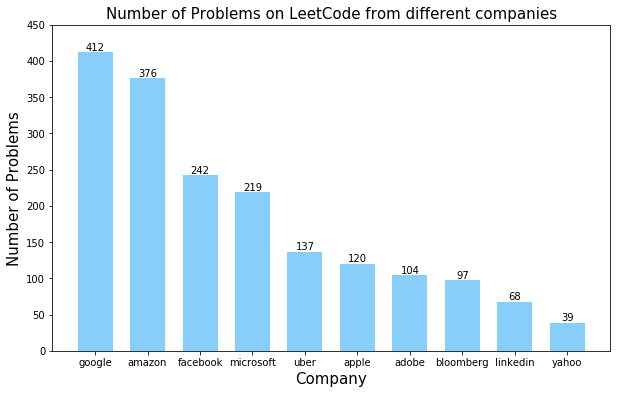

In [6]:
name_list = companies
num_list = values
font1={'size'   : 15}
font2={'size'   : 15}
plt.rcParams['figure.figsize'] = (10.0, 6.0) # set figure_size
rects=plt.bar(range(0,3*len(num_list),3), num_list, color='lightskyblue',width=2)
# X axis's label
index=list(range(0,3*len(num_list),3))
index=[float(c)+0 for c in index]
plt.ylim(ymax=450, ymin=0)

plt.xticks(index, name_list)
plt.xlabel('Company',font2)
plt.ylabel("Number of Problems",font2) 
plt.title('Number of Problems on LeetCode from different companies',font1)
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, str(height), ha='center', va='bottom')
# plt.savefig('problem_num_of_different_companies')
plt.show()


# Plot Pie Chart

In [7]:
folder_name='output_AllQus'
def extract_companys_problems(company=None):
    '''
    This function extract the problems a given company
    Para: company: the given company's name 
    Return: a dictionary showing different companies' problems' difficulty and tag
    '''
    assert isinstance(company,str)
    tag_ratio=dict()
    difficulty_ratio=dict()
    all_questions_folder='output_AllQus'
    folders_in_all_questions_folder=os.listdir(folder_name)
    file_name='company_folder/'+'leetcode_links_company_'+company+'.txt'
    file=open(file_name,'r')
    for line in file:
        problem_name=line[30:-2]
        for term in folders_in_all_questions_folder:
            if problem_name in term:
                
                description_problem=open(all_questions_folder+'/'+term+'/README.md','r',encoding='utf-8')
                
                for line2 in description_problem:
                    if '**Tags:**' in line2:
                        tag_list=line2[10:-1].split(', ')
                        for tag in tag_list:
                            if tag in tag_ratio:
                                tag_ratio[tag]=tag_ratio[tag]+1
                            else:
                                tag_ratio[tag]=1
                    if '**Difficulty:**' in line2:
                        difficulty=line2[16:-1]
                        if difficulty in difficulty_ratio:
                            difficulty_ratio[difficulty]=difficulty_ratio[difficulty]+1
                        else:
                            difficulty_ratio[difficulty]=1
                description_problem.close()
                break
    file.close()
    return tag_ratio,difficulty_ratio
company_name2='microsoft'
company_tag,company_difficulty=extract_companys_problems(company_name2)
print(company_difficulty)

{'Medium': 104, 'Easy': 67, 'Hard': 35}


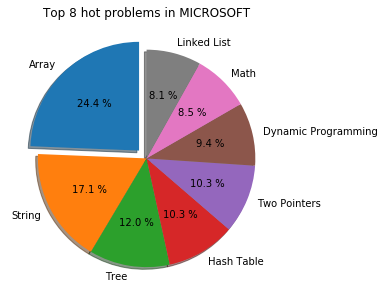

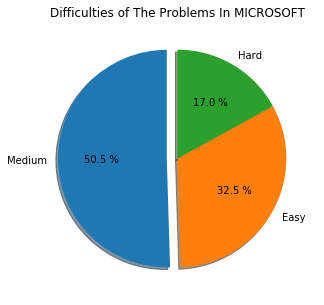

In [8]:
top_labels=[]
top_values=[]
top_num=8
company_sorted=sorted(company_tag.items(),key=lambda x:x[1],reverse=True)
for term in company_sorted[0:top_num]:
    top_labels.append(term[0])
    top_values.append(term[1])
###### Plot the figure of tags' ratio
explode=[0]*top_num
explode[0]=0.1
plt.rcParams['figure.figsize'] = (5.0, 5.0) # 设置figure_size尺寸
plt.axes(aspect=1)  # set this , Figure is round, otherwise it is an ellipse
#autopct ，show percet
plt.pie(x=top_values, labels=top_labels, explode=explode,autopct='%3.1f %%',
        shadow=True, labeldistance=1.1, startangle = 90,pctdistance = 0.6
        )
plt.title('Top {} hot problems in {}'.format(top_num,company_name2.upper()))
# plt.savefig('Pie chart of most asked problems in {}'.format(company_name2.upper()))
plt.show()

####### Plot the figure of difficulties' ratio
explode_diff=[0]*3
explode_diff[0]=0.1
plt.axes(aspect=1)  
plt.pie(x=company_difficulty.values(), labels=company_difficulty.keys(), explode=explode_diff,autopct='%3.1f %%',
        shadow=True, labeldistance=1.1, startangle = 90,pctdistance = 0.6
        )
plt.title('Difficulties of The Problems In {}'.format(company_name2.upper()))
# plt.savefig('Pie chart of Difficulties of problems in {}'.format(company_name2.upper()))
plt.show()

# Plot WordCloud

In [9]:
file=pd.read_csv('Dice_US_jobs_utf81.csv',error_bad_lines=False)
print(file.columns)
word_freq={}
for job in file['job_title']:
    try:
        job=job.translate(str.maketrans('', '', string.punctuation))
        words=job.split()
        for word in words:
            if word in word_freq:
                word_freq[word]=word_freq[word]+1
            else:
                word_freq[word]=1
    except:
        pass
most_freq=sorted(word_freq.items(),key=lambda x: x[1],reverse=True)[0:40]
most_freq=dict(most_freq)
print(dict(most_freq))

b'Skipping line 1564: expected 12 fields, saw 35\nSkipping line 1914: expected 12 fields, saw 13\nSkipping line 4055: expected 12 fields, saw 38\nSkipping line 8715: expected 12 fields, saw 17\nSkipping line 10089: expected 12 fields, saw 18\nSkipping line 10683: expected 12 fields, saw 15\nSkipping line 13947: expected 12 fields, saw 13\nSkipping line 13982: expected 12 fields, saw 13\nSkipping line 15642: expected 12 fields, saw 13\nSkipping line 17411: expected 12 fields, saw 13\nSkipping line 17542: expected 12 fields, saw 23\nSkipping line 18214: expected 12 fields, saw 13\nSkipping line 18225: expected 12 fields, saw 13\nSkipping line 18374: expected 12 fields, saw 40\n'


Index(['country_code', 'date_added', 'job_board', 'job_description',
       'job_title', 'job_type', 'location', 'organization', 'page_url',
       'phone_number', 'salary', 'sector'],
      dtype='object')
{'Manager': 1528, 'Software': 1907, 'Full': 339, 'Architect': 938, 'Systems': 966, 'Business': 818, 'Front': 339, 'SAP': 359, 'QA': 344, 'Technical': 513, 'Net': 298, 'Data': 819, 'Oracle': 307, 'C': 343, 'Lead': 887, 'Technician': 379, 'Specialist': 447, 'Developer': 4834, 'Web': 541, 'Engineer': 5295, 'Java': 959, 'Senior': 2485, 'Administrator': 760, 'DevOps': 293, 'Analyst': 1970, 'in': 320, 'Security': 623, 'NET': 478, 'Consultant': 577, 'Stack': 294, 'Network': 676, 'and': 329, 'with': 487, 'Development': 278, 'Sr': 1176, 'Support': 655, 'Application': 442, 'IT': 541, 'End': 337, 'Project': 900}


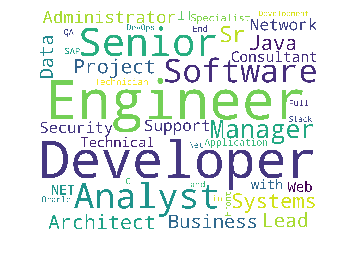

In [10]:
wc = WordCloud(background_color='white',
               width=4000,
               height=3200,
               ).generate_from_frequencies(most_freq)
# wc.to_file('jobcloud.png') 
plt.imshow(wc) 
plt.axis('off') 
plt.show() 

# Plot US MAP of Job Distribution

In [11]:
file=pd.read_csv('Dice_US_jobs_utf81.csv',error_bad_lines=False)
location=dict()
states_list=['AK','AR','AZ','CA','FL','LA','NM','NV','OK','OR','TX','UT','AL','CO','CT','DE','GA','IA',
            'ID','IL','IN','KS','KY','MA','WI','MD','ME','MI','MN','MO','MS',
            'MT','NC','ND','NE','NH','NJ','NY','OH','PA','WV','RI','SC','SD',
            'TN','VA','VT','WA','WY','HI','RL']
for term in file['location']:
    
    try:
        location_cur=term.split(', ')[1]
    except:
        pass
    location_cur=location_cur.upper()
    if location_cur in states_list:
        if location_cur in location:
            location[location_cur]=location[location_cur]+1
        else:
            location[location_cur]=1
for temp_state in states_list:
    if temp_state not in location:
        location[temp_state]=1
print(location)

b'Skipping line 1564: expected 12 fields, saw 35\nSkipping line 1914: expected 12 fields, saw 13\nSkipping line 4055: expected 12 fields, saw 38\nSkipping line 8715: expected 12 fields, saw 17\nSkipping line 10089: expected 12 fields, saw 18\nSkipping line 10683: expected 12 fields, saw 15\nSkipping line 13947: expected 12 fields, saw 13\nSkipping line 13982: expected 12 fields, saw 13\nSkipping line 15642: expected 12 fields, saw 13\nSkipping line 17411: expected 12 fields, saw 13\nSkipping line 17542: expected 12 fields, saw 23\nSkipping line 18214: expected 12 fields, saw 13\nSkipping line 18225: expected 12 fields, saw 13\nSkipping line 18374: expected 12 fields, saw 40\n'


{'NM': 29, 'NE': 103, 'VT': 36, 'AL': 72, 'NJ': 844, 'DE': 155, 'MS': 6, 'NH': 133, 'HI': 8, 'CT': 470, 'ID': 18, 'MO': 234, 'CO': 641, 'AR': 77, 'AZ': 329, 'NC': 525, 'ND': 10, 'IA': 95, 'OK': 59, 'OR': 446, 'CA': 4401, 'MD': 672, 'WV': 18, 'FL': 1395, 'KY': 148, 'TN': 282, 'WI': 187, 'UT': 279, 'ME': 60, 'SC': 176, 'MN': 385, 'MA': 1386, 'AK': 9, 'OH': 455, 'NV': 125, 'MT': 6, 'RI': 81, 'IL': 745, 'RL': 1, 'IN': 204, 'WA': 358, 'PA': 879, 'KS': 125, 'NY': 1431, 'TX': 1092, 'LA': 151, 'WY': 2, 'GA': 579, 'SD': 16, 'MI': 718, 'VA': 1042}


## This plot is shown as a file end with '.html'

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

for col in df.columns:
    df[col] = df[col].astype(str)

scl = [
    [0.0, 'rgb(242,240,247)'],
    [0.2, 'rgb(218,218,235)'],
    [0.4, 'rgb(188,189,220)'],
    [0.6, 'rgb(158,154,200)'],
    [0.8, 'rgb(117,107,177)'],
    [1.0, 'rgb(84,39,143)']
]


data = [go.Choropleth(
    autocolorscale = True,
    locations=list(location.keys()),
    z=list(location.values()),
    locationmode = 'USA-states',
    visible=True,
    text=list(location.values()),
    hovertext=list(location.values()),
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Number of Jobs")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = '2017 US Jobs On Monster.com'
    ),
    hovermode='closest',
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
        legend = go.layout.Legend(
           traceorder = 'reversed'
    )
)

fig = go.Figure(data = data, layout = layout)
plotly.offline.plot(fig, filename = 'd3-cloropleth-map')

# Plot problem difficulties of different companies

In [12]:
def company_question():
    df = pd.DataFrame()
    Companies=['google', 'amazon', 'apple','facebook','linkedin','microsoft']
   
    for com in Companies:
        companies_tag,companies_difficulty=extract_companys_problems(company=com)
        total=sum(companies_tag.values())
        companies_tag = {k: v / total for k, v in companies_tag.items()}
        companies_difficulty = {l: w / total for l, w in companies_difficulty.items()}
        print(total)
        df1 = pd.DataFrame.from_dict(companies_difficulty, orient = 'index',columns = [com])
        df2 = pd.DataFrame.from_dict(companies_tag, orient = 'index',columns = [com])
        df1 = pd.concat([df1,df2],axis = 0,sort = True)
        df = pd.concat([df,df1], axis=1, join_axes=[df1.index])
    #print(df)
    df.to_csv(r'company_dataframe.csv')
    return df

def plot_company():
    total = pd.read_csv('company_dataframe.csv',index_col = 0)
total = pd.read_csv('company_dataframe.csv',index_col = 0)
total.head(5)

,google,amazon,apple,facebook,linkedin,microsoft
Easy,0.160596,0.154472,0.203620,0.136139,0.138614,0.175853
Hard,0.119205,0.105691,0.095023,0.096535,0.118812,0.091864
Medium,0.283113,0.292683,0.230769,0.299505,0.287129,0.272966
NaN,NaN,NaN,NaN,NaN,NaN,0.013123
Dynamic Programming,0.074503,0.065041,0.054299,0.059406,0.059406,0.057743


['google', 'amazon', 'apple', 'facebook', 'linkedin', 'microsoft']
[array([0.16059603, 0.15447154, 0.20361991, 0.13613861, 0.13861386,
       0.17585302]), array([0.1192053 , 0.10569106, 0.09502262, 0.09653465, 0.11881188,
       0.09186352]), array([0.28311258, 0.29268293, 0.23076923, 0.29950495, 0.28712871,
       0.27296588])]
6 len


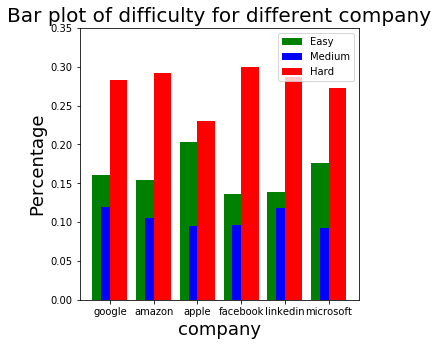

In [15]:
x = list(total.columns.values)
print(x)
y = list(total.values)[0:3]
print(y)
x1 = np.arange(len(x))
wid = 0.2
print(len(list(total.values)[0:3][0]),'len')
ax = plt.subplot(111)
#plt.figure(figsize = (20,12))
ax.bar(x1-wid, list(total.values)[0:3][0],color = 'g',width=0.4,align='center',label = 'Easy')
ax.bar(x1, list(total.values)[0:3][1],color = 'b',width=0.4,align='center',label = 'Medium')
ax.bar(x1+wid, list(total.values)[0:3][2],color = 'r',width=0.4,align='center',label = 'Hard')
# ax.set_xticklabels(x)
plt.xticks([0,1,2,3,4,5,],x)
ax.autoscale_view()
plt.legend()
plt.xlabel("company",fontsize=18)
plt.ylim([0,0.35])
plt.ylabel("Percentage",fontsize=18)
plt.title("Bar plot of difficulty for different company",fontsize=20)
plt.show()

# Plot of Number of problems solved by user grouped by company

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
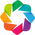

In [2]:
import numpy as np
import pandas as pd
import holoviews as hv
hv.extension('bokeh')


In [3]:
company_df = pd.read_csv('data/company_tag_AC.csv')
tag_list = company_df['tags']
reqd_tags = ['Array', 'Tree','DynamicProgramming','String','HashTable', 'Depth-firstSearch']
tag_select = []
for k in tag_list: tag_select.append(True if k in reqd_tags else False)
company_df = company_df.loc[tag_select,:]
company_df = company_df.sort_values('count', ascending=False)
truncated_df = company_df[company_df['count']>0]
vdims = [('count', 'Number of solved problems')]
ds = hv.Dataset(truncated_df, ['user', 'company', 'tags'], vdims)
print(ds)

:Dataset   [user,company,tags]   (count)


In [4]:
from holoviews import opts
axis_range = np.unique(ds['count'])[-2]
layout = ds.sort('count', reverse=True).sort(['company','user'], reverse=False).to(hv.Bars,'tags','count',groupby=['company','user'])
layout.opts(
    opts.Bars(height=400, width=500,xrotation=30, tools=['hover'], show_frame=True, framewise=True, show_legend=True)).redim.range(y=(0,axis_range))


:HoloMap   [company,user]
   :Bars   [tags]   (count)

# Number of questions solved by each user relevant to each company

In [5]:
%matplotlib qt

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pylab import subplots

#fig,axs = subplots()
company_AC = pd.read_csv('data/company_tag_AC_count.csv')
print(company_AC)
names = list(company_AC.iloc[0,1:].index)
df = pd.DataFrame({'company':company_AC['company']})
company_list = list(company_AC['company'])
fig, ax = plt.subplots()
ind = np.arange(len(company_list))
width = 0.4
rects1 = ax.bar(ind - width/4, company_AC['Alice'], width/4, label='Alice')
rects2 = ax.bar(ind + width/4, company_AC['Dave'], width/4, label='Dave')
rects3 = ax.bar(ind + width/2, company_AC['Eve'], width/4, label='Eve')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Number of questions solved per company by user')
ax.set_xticks(ind)
ax.set_xticklabels(company_list)
ax.legend()


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects1, "left")
autolabel(rects2, "left")
autolabel(rects3, "left")

fig.tight_layout()

plt.show()

     company  Alice  Bob  Carl  Dave  Eve  Frank
0      adobe     25  397    25    21   47     86
1     amazon     25  397    25    21   47     86
2      apple     25  397    25    21   47     86
3  bloomberg     25  397    25    21   47     86
4   facebook     25  397    25    21   47     86
5     google     25  397    25    21   47     86
6   linkedin     25  397    25    21   47     86
7  microsoft     25  397    25    21   47     86
8       uber     25  397    25    21   47     86
9      yahoo     25  397    25    21   47     86
